# Treinamento Data Science com Python
Playlist com o curso disponível [aqui](https://www.youtube.com/playlist?list=PLMdYygf53DP7YZiFUtGTWJJlvynRyrna-).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
uri_filmes = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula4.1/movies.csv"
uri_notas = "https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula4.1/ratings.csv"

filmes = pd.read_csv(uri_filmes, sep=",")
notas = pd.read_csv(uri_notas, sep=",")

## Primeira Aula
Introdução a Ciência de Dados

In [ ]:
# traz os 5 primeiros
filmes.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
filmes.columns

Index(['movieId', 'title', 'genres'], dtype='object')

In [9]:
#renomear colunas
filmes.columns = ['id_filme', 'titulo', 'generos']
filmes.head()

,id_filme,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
notas.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [10]:
notas.columns = ['id_usuario', 'id_filme', 'nota', 'momento']
notas.head()

,id_usuario,id_filme,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
# retorna os valores únicos existentes para essa coluna.
# notas['nota'] é uma series, mas o retorno do unique é um array do numpy
valores_possiveis = notas['nota'].unique()

In [ ]:
# O pandas é construído sobre o numpy
type(valores_possiveis)

numpy.ndarray

In [ ]:
valores_possiveis.sort()
valores_possiveis

array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ])

In [ ]:
# média
notas['nota'].mean()

3.501556983616962

In [ ]:
notas.describe()

,id_usuario,id_filme,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


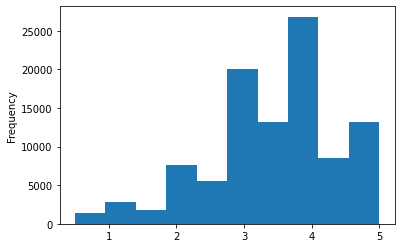

In [ ]:
notas.nota.plot(kind="hist")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


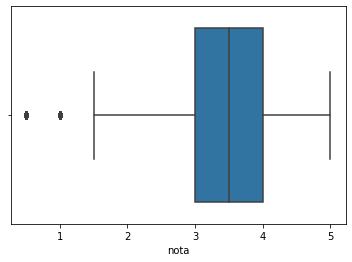

In [ ]:
sns.boxplot(notas.nota)

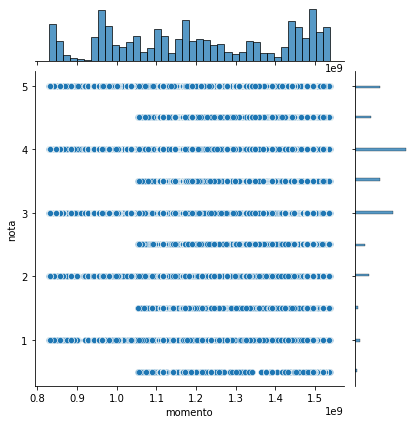

In [ ]:
sns.jointplot(x='momento',y='nota', data=notas[['nota', 'momento']])

## Segunda Aula
Introdução a Machine Learning

#### Qual a diferença entre um porco e um cachorro?
Classificação binária

In [3]:
# Pelo longo? (1 ou 0)
# Perna curta? (1 ou 0)
# Faz auau? (1 ou 0)

porco_1 = [0, 1, 0]
porco_2 = [0, 1, 1]
porco_3 = [1, 1, 0]

cachorro_1 = [0, 1, 1]
cachorro_2 = [1, 0, 1]
cachorro_3 = [1, 1, 1]

treino_x = [porco_1, porco_2, porco_3, cachorro_1, cachorro_2, cachorro_3]

# 0 -> Cachorro
# 1 -> Porco

treino_y = [1, 1, 1, 0, 0, 0]

In [4]:
treino_x

[[0, 1, 0], [0, 1, 1], [1, 1, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]]

##### **Função para obtenção do resultado**

Desejamos uma função do tipo:

$$
f(x;y,z) = [0 ou 1]
$$

Onde:

* x => Pelo
* y => Perna curta
* z => Faz auau


Vamos agora para a bibliteca de aprendizado de máquina: *sklearn*

In [5]:
from sklearn.svm import LinearSVC

modelo = LinearSVC()
modelo.fit(treino_x, treino_y)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [6]:
animal_1 = [0, 0, 0] #porco
animal_2 = [0, 0, 1] #cachorro -> Simulação de exceção: Porco
animal_3 = [1, 0, 0] #porco
animal_4 = [0, 1, 1] #cachorro

# Vamos dizer que é possível um porco as vezes fazer auau
resultado_esperado = [1, 1, 1, 0]
resultado_obtido = modelo.predict([animal_1, animal_2, animal_3, animal_4])

In [7]:
resultado_obtido

array([1, 0, 1, 0])

In [8]:
from sklearn.metrics import accuracy_score

taxa_acerto = accuracy_score(resultado_esperado, resultado_obtido)
taxa_acerto

0.75

## Terceira Aula
Data Visualization

#### **Preparando os dados**

In [11]:
filmes = filmes.set_index('id_filme')

# É o Get Dummies que transforma em várias colunas a lista de gêneros.
# (OBS: Como que ele sabe que o separador é "|"?)
filmes = filmes.join(filmes.generos.str.get_dummies()).drop("generos", axis=1)

In [12]:
filmes['ano'] = filmes.titulo.str.extract(r'.*\((\d+)\)')
filmes = filmes.dropna()

In [13]:
arredondadas = notas.nota.round(1)
medias = notas.groupby('id_filme')['nota'].mean()
filmes = filmes.join(medias).dropna().sort_values('nota', ascending=False).rename(columns={"nota":"media"})
total = notas.groupby('id_filme').momento.count()
filmes = filmes.join(total)
filmes = filmes.rename(columns={"momento":"total"})
filmes = filmes.query("total > 50")
filmes["media_categoria"] = (filmes["media"]).round(1).values

In [14]:
random_filmes = filmes.sample(10)
random_filmes

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,media,total,media_categoria
id_filme,,,,,,,,,,,,,,,,,,,,,,,,,
594,Snow White and the Seven Dwarfs (1937),0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1937,3.616883,77,3.6
3751,Chicken Run (2000),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2000,3.551282,78,3.6
10,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1995,3.496212,132,3.5
2716,Ghostbusters (a.k.a. Ghost Busters) (1984),0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1984,3.775000,120,3.8
4308,Moulin Rouge (2001),0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,2001,3.590909,55,3.6
2011,Back to the Future Part II (1989),0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1989,3.505747,87,3.5
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1995,3.431818,110,3.4
2291,Edward Scissorhands (1990),0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1990,3.700000,80,3.7
736,Twister (1996),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1996,3.321138,123,3.3


In [ ]:
notas.head()

,id_usuario,id_filme,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [ ]:
random_filmes

,titulo,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,ano,media,total,media_categoria
id_filme,,,,,,,,,,,,,,,,,,,,,,,,,
784,"Cable Guy, The (1996)",0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1996,2.805556,54,2.8
2321,Pleasantville (1998),0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1998,3.483607,61,3.5
1201,"Good, the Bad and the Ugly, The (Buono, il bru...",0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1966,4.145833,72,4.1
380,True Lies (1994),0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1994,3.497191,178,3.5
47,Seven (a.k.a. Se7en) (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1995,3.975369,203,4.0
5502,Signs (2002),0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,2002,3.166667,63,3.2
63082,Slumdog Millionaire (2008),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,2008,3.809859,71,3.8
595,Beauty and the Beast (1991),0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,1991,3.770548,146,3.8
60069,WALL·E (2008),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,2008,4.057692,104,4.1


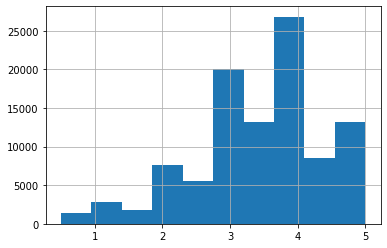

In [16]:
notas.nota.hist()

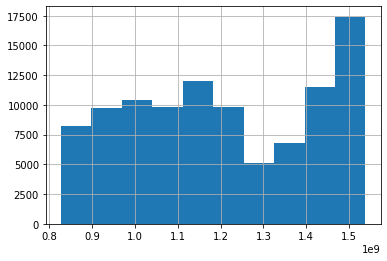

In [ ]:
# histograma dos momentos dos votos
notas.momento.hist()

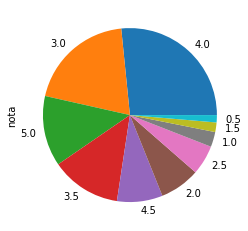

In [ ]:
#Não há uma boa visualização dos dados o gráfico de pizza.
arredondadas.value_counts().plot.pie()

In [ ]:
arredondadas = arredondadas.value_counts().to_frame().reset_index().sort_values('index').set_index("index")

In [ ]:
arredondadas

,nota
index,
0.5,1370
1.0,2811
1.5,1791
2.0,7551
2.5,5550
3.0,20047
3.5,13136
4.0,26818
4.5,8551


In [ ]:
arredondadas = notas.nota.round(1)
arredondadas

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
         ... 
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

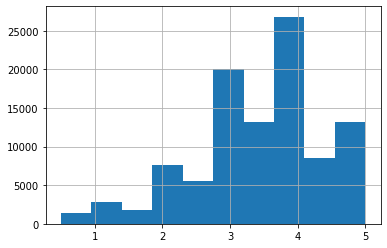

In [ ]:
arredondadas.hist()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


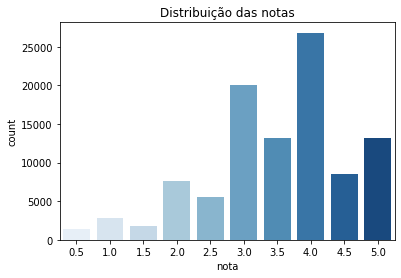

In [ ]:
# Para outras palettes, basta buscar a documentação
palette = sns.color_palette('Blues', n_colors=10)
plt.title("Distribuição das notas")
sns.countplot(arredondadas, palette=palette)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


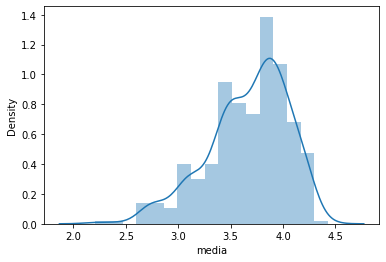

In [ ]:
# Gráfico de distribuição das médias de avaliações dos filmes, mostrando as concentrações das avaliações por filme
sns.distplot(filmes['media'])

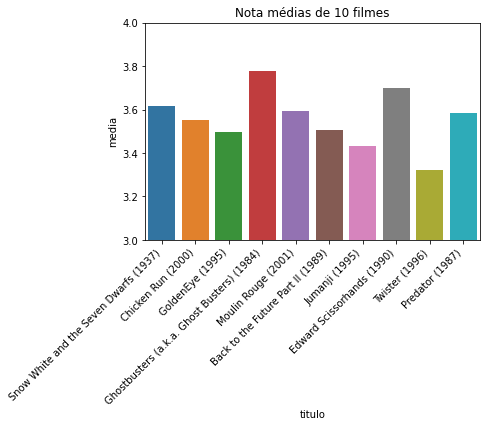

In [20]:
random_filmes_plot = sns.barplot(data = random_filmes, x = "titulo", y = "media")
random_filmes_plot.set_xticklabels(random_filmes_plot.get_xticklabels(), rotation = 45, horizontalalignment = 'right')
plt.title("Nota médias de 10 filmes")

# Definir um limite para o y pode trazer uma exibição distorcida dos dados e suas proporções
plt.ylim(3, 4)
plt.show()

#### **Gráficos de distribuição**

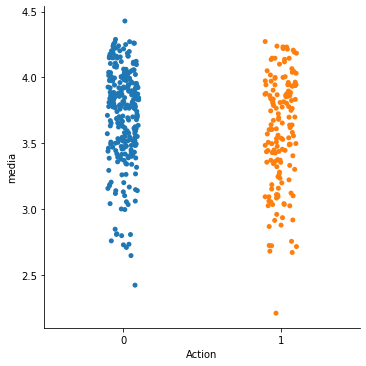

In [ ]:
# Comparação de distribuição de uma categoria com o todo
sns.catplot(data = filmes, x = "Action", y = 'media')

In [ ]:
distribuicao_ano_plot = sns.catplot(data=filmes, x = 'ano', y = "media")
distribuicao_ano_plot.set_xticklabels(rotation = 45, horizontalalignment = 'right')

ValueError: ignored

#### **Concatenação de gráficos**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


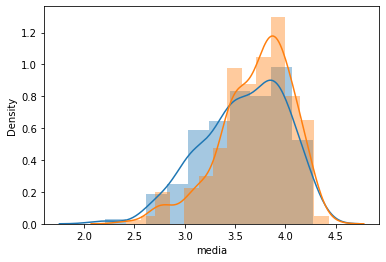

In [ ]:
# Comparando o histograma das médias da categoria Ação vs todos
sns.distplot(filmes.query("Action == 1")['media'])
sns.distplot(filmes.query("Action == 0")['media'])
plt.show()

#### **Gráfico de caixas (ou gráfico de velas)**

Gráfico que mostra a distribuição dos resultados, trazendo uma noção gráfica do desvio padrão.

1. As extremidades são os valores máximos e mínimos -> A média dos valores menores)
2. Os pontos são "pontos fora da curva"
3. A caixa colorida representa a localização de 50% dos dados, quanto menor, mais concentrada estão as respostas que impactaram mais na média.
4. O traço dentro do colorido é a mediana do resultado total.

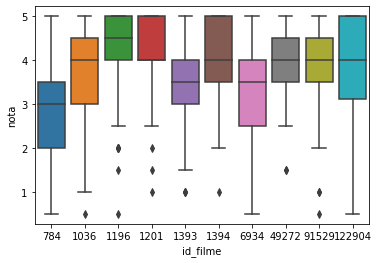

In [ ]:
# Como saber se a distribuição está próximo a média (observar a variação do desvio padrão)
ids_aleatorios = ','.join(random_filmes.index.astype(str))
query = f'id_filme in ({ids_aleatorios})'
sns.boxplot(data = notas.query(query), x='id_filme', y='nota')